In [ ]:
import pandas as pd
from scipy.signal import savgol_filter, butter, filtfilt

# Load magnetic field data from csv file
df = pd.read_csv('/content/original_all_data_in_this_file_ground_floor - merged_data_0_1.csv')

# Extract magnetic field values from data frame
magnetic_field = df[['X-axis', 'Y-axis', 'Z-axis']].values
Beacon_data =df[[ 'Beacon-22', 'Beacon-20', 'Beacon-c8', 'Beacon-2f']].values


# Apply low-pass filter
fs = 70.0  # Sampling frequency (Hz)
cutoff_freq = 2.0  # Cutoff frequency (Hz)
nyquist_freq = 0.5 * fs
normalized_cutoff_freq = cutoff_freq / nyquist_freq
b, a = butter(3, normalized_cutoff_freq, btype='low')
lp_field = filtfilt(b, a, Beacon_data, axis=0)


# Apply low-pass filter
fs = 70.0  # Sampling frequency (Hz)
cutoff_freq = 2.0  # Cutoff frequency (Hz)
nyquist_freq = 0.5 * fs
normalized_cutoff_freq = cutoff_freq / nyquist_freq
b, a = butter(3, normalized_cutoff_freq, btype='high')
hp_field = filtfilt(b, a, magnetic_field, axis=0)

# Add smoothed magnetic field data to original data frame
df['Smoothed LP Field X'] = hp_field[:, 0]
df['Smoothed LP Field Y'] = hp_field[:, 1]
df['Smoothed LP Field Z'] = hp_field[:, 2]
df['Smoothed HP Field P'] = lp_field[:, 0]
df['Smoothed HP Field Q'] = lp_field[:, 1]
df['Smoothed HP Field R'] = lp_field[:, 2]
df['Smoothed HP Field S'] = lp_field[:, 3]


# Save smoothed magnetic field data to separate csv files
df[['Smoothed LP Field X', 'Smoothed LP Field Y', 'Smoothed LP Field Z',
    'Smoothed HP Field P','Smoothed HP Field Q','Smoothed HP Field R','Smoothed HP Field S','x','y']].to_csv('smoothed_lp_field.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Load the dataset
df = pd.read_csv('/content/smoothed_lp_field.csv')

# Split the data into training and testing datasets
X = df[['Smoothed LP Field X', 'Smoothed LP Field Y', 'Smoothed LP Field Z',
    'Smoothed HP Field P','Smoothed HP Field Q','Smoothed HP Field R','Smoothed HP Field S']]
y = df.iloc[:, -2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
print("Linear Regression Results:")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred):.2f}")

# Train a decision tree regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print("\nDecision Tree Results:")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred):.2f}")

# Train a random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("\nRandom forest Results:")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred):.2f}")




# Create an XGBoost model and train it on the training data
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Use the XGBoost model to make predictions on the testing data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model using mean squared error and R-squared
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Results:")
print("Mean squared error: {:.2f}".format(mse_xgb))
print("R-squared: {:.2f}".format(r2_xgb))

Linear Regression Results:
Mean squared error: 1.87
R-squared: 0.52

Decision Tree Results:
Mean squared error: 0.43
R-squared: 0.89

Random forest Results:
Mean squared error: 0.12
R-squared: 0.97

XGBoost Results:
Mean squared error: 0.18
R-squared: 0.95


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import numpy as np

# Load the dataset
df = pd.read_csv('/content/smoothed_lp_field.csv')

# Split the data into training and testing datasets
X = df[['Smoothed LP Field X', 'Smoothed LP Field Y', 'Smoothed LP Field Z',
    'Smoothed HP Field P','Smoothed HP Field Q','Smoothed HP Field R','Smoothed HP Field S']]
y = df.iloc[:, -2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred)
print("Linear Regression Results:")
print(f"Mean squared error: {mse_lr:.2f}")
print(f"Root mean squared error: {rmse_lr:.2f}")
print(f"R-squared: {r2_lr:.2f}")

# Train a decision tree regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred)
print("\nDecision Tree Results:")
print(f"Mean squared error: {mse_dt:.2f}")
print(f"Root mean squared error: {rmse_dt:.2f}")
print(f"R-squared: {r2_dt:.2f}")

# Train a random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred)
print("\nRandom forest Results:")
print(f"Mean squared error: {mse_rf:.2f}")
print(f"Root mean squared error: {rmse_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")

# Create an XGBoost model and train it on the training data
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Use the XGBoost model to make predictions on the testing data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model using mean squared error and R-squared
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Results:")
print(f"Mean squared error: {mse_xgb:.2f}")
print(f"Root mean squared error: {rmse_xgb:.2f}")
print(f"R-squared: {r2_rf:.2f}")

Linear Regression Results:
Mean squared error: 1.87
Root mean squared error: 1.37
R-squared: 0.52

Decision Tree Results:
Mean squared error: 0.43
Root mean squared error: 0.66
R-squared: 0.89

Random forest Results:
Mean squared error: 0.12
Root mean squared error: 0.34
R-squared: 0.97

XGBoost Results:
Mean squared error: 0.18
Root mean squared error: 0.42
R-squared: 0.97


In [ ]:
# Load the new data into a DataFrame
new_data = pd.read_csv('/content/original_all_data_in_this_file_ground_floor - predict_merged_0_1_lp (2).csv')

# Make predictions using the Linear Regression model
lr_predictions = linear_model.predict(new_data)

# Make predictions using the Decision Tree Regressor model
dt_predictions = dt_model.predict(new_data)

# Make predictions using the Random Forest Regressor model
rf_predictions = rf_model.predict(new_data)

# Make predictions using the XGBoost Regressor model
xgb_predictions = xgb_model.predict(new_data)

# Print the predictions for each model
print("Linear Regression Predictions:")
print(lr_predictions)

print("\nDecision Tree Predictions:")
print(dt_predictions)

print("\nRandom Forest Predictions:")
print(rf_predictions)

print("\nXGBoost Predictions:")
print(xgb_predictions)


Linear Regression Predictions:
[[-0.42320781  3.47058631]
 [-0.27068803  3.3873568 ]
 [-0.22312041  3.19274618]
 [-0.10954846  3.1188141 ]
 [ 0.34217294  3.55288671]
 [ 0.28057578  3.23983949]
 [ 0.24107244  3.01337851]
 [ 0.33199875  3.00975332]
 [ 0.69378803  3.41209315]
 [ 0.64690655  3.22276189]
 [ 0.52773388  2.97574814]
 [ 0.51542705  2.91030046]
 [ 0.84326417  3.34429746]
 [ 0.769261    3.18495877]
 [ 0.67173344  3.02868415]
 [ 0.64910488  2.99292643]
 [ 1.00994314  3.50543334]
 [ 0.95758953  3.39474953]
 [ 0.83556926  3.20603589]
 [ 0.86905039  3.24851692]
 [ 1.25511823  3.78559926]
 [ 1.19679278  3.64946586]
 [ 1.10126586  3.48173386]
 [ 1.2028838   3.60702334]
 [ 1.6317973   4.19041621]
 [ 1.58047463  4.0488623 ]
 [ 1.53129854  3.93723188]
 [ 1.60790683  4.01342938]
 [ 0.46710466  2.23142999]
 [ 0.44917213  2.13503053]
 [ 0.34497124  1.93426471]
 [ 0.42592809  2.01072221]
 [ 0.84534557  2.57172044]
 [ 0.81168686  2.45228313]
 [ 0.7178161   2.27208872]
 [ 0.80008347  2.3606218

In [ ]:
# Load the new data into a DataFrame
#new_data = pd.read_csv('/content/original_all_data_in_this_file - predict_mag_0_1_on_filtered (7).csv')

# Make predictions using the Linear Regression model
lr_predictions = linear_model.predict(new_data)

# Make predictions using the Decision Tree Regressor model
dt_predictions = dt_model.predict(new_data)

# Make predictions using the Random Forest Regressor model
rf_predictions = rf_model.predict(new_data)

# Make predictions using the XGBoost Regressor model
xgb_predictions = xgb_model.predict(new_data)

# Load the actual values into a DataFrame (if available)
actual_values = pd.read_csv('/content/original_all_data_in_this_file_ground_floor - actual_cord_0_1_lp (1).csv')

# Calculate the differences between the predicted and actual values
lr_diff = abs(lr_predictions - actual_values)
dt_diff = abs(dt_predictions - actual_values)
rf_diff = abs(rf_predictions - actual_values)
xgb_diff = abs(xgb_predictions - actual_values)

# Count the number of wrongly predicted values for each model based on a threshold (e.g., difference > 0.1)
lr_wrong_predictions = (lr_diff > 0.5).sum().sum()
dt_wrong_predictions = (dt_diff > 0.5).sum().sum()
rf_wrong_predictions = (rf_diff > 0.5).sum().sum()
xgb_wrong_predictions = (xgb_diff > 0.5).sum().sum()

# Print the number of wrongly predicted values for each model
print("Linear Regression Wrong Predictions:", lr_wrong_predictions)
print("Decision Tree Wrong Predictions:", dt_wrong_predictions)
print("Random Forest Wrong Predictions:", rf_wrong_predictions)
print("XGBoost Wrong Predictions:", xgb_wrong_predictions)

Linear Regression Wrong Predictions: 215
Decision Tree Wrong Predictions: 37
Random Forest Wrong Predictions: 50
XGBoost Wrong Predictions: 64


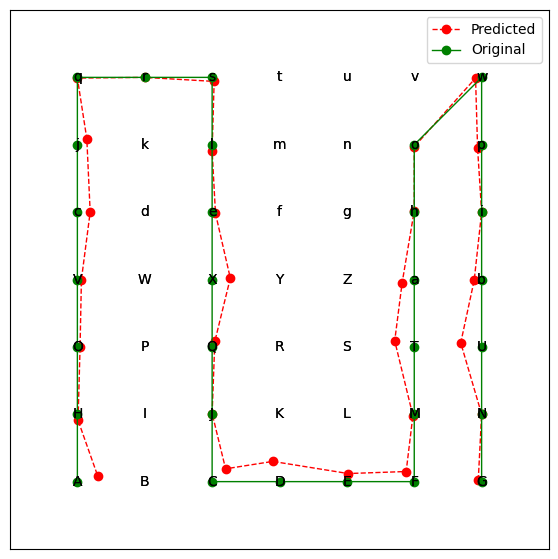

In [ ]:
import matplotlib.pyplot as plt

# Define the grid
grid = [['A', 'B', 'C', 'D', 'E', 'F', 'G'],
        ['H', 'I', 'J', 'K', 'L', 'M', 'N'],
        ['O', 'P', 'Q', 'R', 'S', 'T', 'U'],
        ['V', 'W', 'X', 'Y', 'Z', 'a', 'b'],
        ['c', 'd', 'e', 'f', 'g', 'h', 'i'],
        ['j', 'k', 'l', 'm', 'n', 'o', 'p'],
        ['q', 'r', 's', 't', 'u', 'v', 'w']]

# Define the path as a list of (x, y) coordinates
path= [(0.02,5.95),(1.0,6.0),(2.06,5.69),(2.99,5.89),(4.0,6.0),(4.95,5.94),(5.99,5.91),(4.97,5.0),(4.02,5.0),(2.95,4.82),
       (2.09,4.71),(0.98,4.98),(0.15,4.88),(0.12,4.02),(0.3,2.9),(0.19,2.2),(1.01,2.0),(2.08,2.04),(3.02,2.27),(3.98,2.05),
       (4.91,2.0),(5.94,2.03),(6.0,1.0),(5.99,0.0),(5.09,0.14),(4.0,0.19),(3.0,0.06),(2.0,0.04),(0.91,0.01),(0.09,0.3)]
path1 = [(0,6),(1,6),(2,6),(3,6),(4,6),(5,6),(6,6),(5,5),(4,5),(3,5),(2,5),
         (1,5),(0,5),(0,4),(0,3),(0,2),(1,2),(2,2),(3,2),(4,2),(5,2),(6,2),
         (6,1),(6,0),(5,0),(4,0),(3,0),(2,0),(1,0),(0,0)]
# Set up the plot
fig, ax = plt.subplots(figsize=(7,7))
ax.set_xlim([-1, 7])
ax.set_ylim([-1, 7])
ax.set_frame_on(True)
ax.set_aspect('equal')

# Remove ticks and labels
ax.set_xticks([])
ax.set_yticks([])

# Plot the grid and path
for i in range(len(grid)):
    for j in range(len(grid[i])):
        ax.text(j, i, grid[i][j], ha='center', va='center', fontsize=10)
path_line, = ax.plot([p[1] for p in path], [p[0] for p in path], 'o--', color='red', linewidth=1)
for i in range(len(grid)):
    for j in range(len(grid[i])):
        ax.text(j, i, grid[i][j], ha='center', va='center', fontsize=10)
path_line, = ax.plot([p[1] for p in path1], [p[0] for p in path1], 'o-', color='green', linewidth=1)

# Add labels to the plot
ax.legend(['Predicted','Original'], loc='upper right')


# Save the figure
plt.savefig('my_plot11.png')

# Show the plot
plt.show()

plt.show()


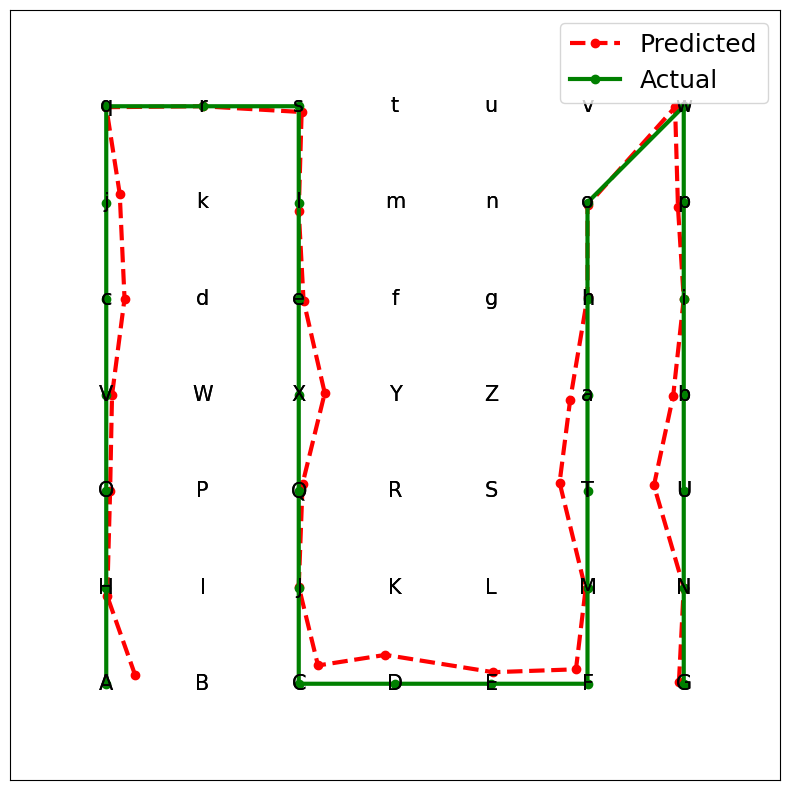

In [ ]:
import matplotlib.pyplot as plt

# Define the grid
grid = [['A', 'B', 'C', 'D', 'E', 'F', 'G'],
        ['H', 'I', 'J', 'K', 'L', 'M', 'N'],
        ['O', 'P', 'Q', 'R', 'S', 'T', 'U'],
        ['V', 'W', 'X', 'Y', 'Z', 'a', 'b'],
        ['c', 'd', 'e', 'f', 'g', 'h', 'i'],
        ['j', 'k', 'l', 'm', 'n', 'o', 'p'],
        ['q', 'r', 's', 't', 'u', 'v', 'w']]

# Define the path as a list of (x, y) coordinates
path= [(0.02,5.95),(1.0,6.0),(2.06,5.69),(2.99,5.89),(4.0,6.0),(4.95,5.94),(5.99,5.91),(4.97,5.0),(4.02,5.0),(2.95,4.82),
       (2.09,4.71),(0.98,4.98),(0.15,4.88),(0.12,4.02),(0.3,2.9),(0.19,2.2),(1.01,2.0),(2.08,2.04),(3.02,2.27),(3.98,2.05),
       (4.91,2.0),(5.94,2.03),(6.0,1.0),(5.99,0.0),(5.09,0.14),(4.0,0.19),(3.0,0.06),(2.0,0.04),(0.91,0.01),(0.09,0.3)]
path1 = [(0,6),(1,6),(2,6),(3,6),(4,6),(5,6),(6,6),(5,5),(4,5),(3,5),(2,5),
         (1,5),(0,5),(0,4),(0,3),(0,2),(1,2),(2,2),(3,2),(4,2),(5,2),(6,2),
         (6,1),(6,0),(5,0),(4,0),(3,0),(2,0),(1,0),(0,0)]

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim([-1, 7])
ax.set_ylim([-1, 7])
ax.set_frame_on(True)
ax.set_aspect('equal')

# Remove ticks and labels
ax.set_xticks([])
ax.set_yticks([])

# Increase font size
plt.rcParams['font.size'] = 18

# Plot the grid and path with increased font size and thicker lines
for i in range(len(grid)):
    for j in range(len(grid[i])):
        ax.text(j, i, grid[i][j], ha='center', va='center', fontsize=15)
path_line, = ax.plot([p[1] for p in path], [p[0] for p in path], 'o--', color='red', linewidth=3)
for i in range(len(grid)):
    for j in range(len(grid[i])):
        ax.text(j, i, grid[i][j], ha='center', va='center', fontsize=15)
path_line, = ax.plot([p[1] for p in path1], [p[0] for p in path1], 'o-', color='green', linewidth=3)

# Add labels to the plot
ax.legend(['Predicted', 'Actual'], loc='upper right')

# Save the figure
plt.savefig('my_plot1.png')

# Show the plot
plt.show()


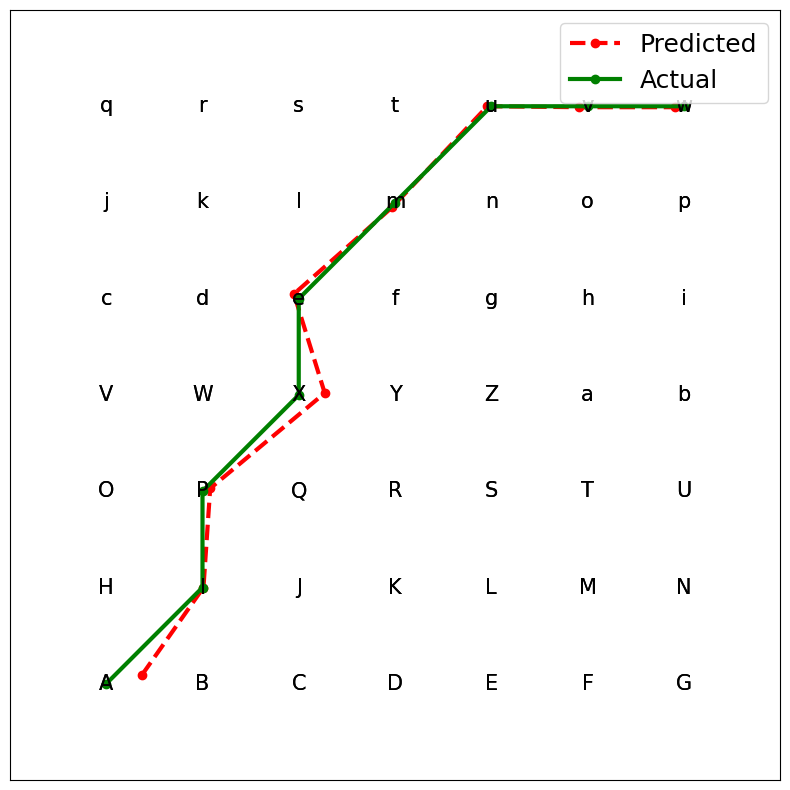

In [ ]:
import matplotlib.pyplot as plt

# Define the grid
grid = [
        ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
        ['H', 'I', 'J', 'K', 'L', 'M', 'N'],
        ['O', 'P', 'Q', 'R', 'S', 'T', 'U'],
        ['V', 'W', 'X', 'Y', 'Z', 'a', 'b'],
        ['c', 'd', 'e', 'f', 'g', 'h', 'i'],
        ['j', 'k', 'l', 'm', 'n', 'o', 'p'],
        ['q', 'r', 's', 't', 'u', 'v', 'w']]

# Define the path as a list of (x, y) coordinates
path= [(0.09,0.37),(1.0,1.01),(2.03,1.08),(3.02,2.27),(4.05,1.95),(4.95,2.97),(6.0,3.96),(5.99,4.91),(5.99,5.91)]
path1 = [(0, 0),(1,1 ), ( 2,1), (3 ,2), (4,2 ),(5,3),(6,4),(6,5),(6,6)]

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim([-1, 7])
ax.set_ylim([-1, 7])
ax.set_frame_on(True)
ax.set_aspect('equal')

# Remove ticks and labels
ax.set_xticks([])
ax.set_yticks([])

# Increase font size
plt.rcParams['font.size'] = 18

# Plot the grid and path with increased font size and thicker lines
for i in range(len(grid)):
    for j in range(len(grid[i])):
        ax.text(j, i, grid[i][j], ha='center', va='center', fontsize=15)
path_line, = ax.plot([p[1] for p in path], [p[0] for p in path], 'o--', color='red', linewidth=3)
for i in range(len(grid)):
    for j in range(len(grid[i])):
        ax.text(j, i, grid[i][j], ha='center', va='center', fontsize=15)
path_line, = ax.plot([p[1] for p in path1], [p[0] for p in path1], 'o-', color='green', linewidth=3)

# Add labels to the plot
ax.legend(['Predicted', 'Actual'], loc='upper right')

# Save the figure
plt.savefig('my_plot11.png')

# Show the plot
plt.show()



In [ ]:
import pandas as pd
from scipy.signal import savgol_filter, butter, filtfilt

# Load magnetic field data from csv file
df = pd.read_csv('/content/Copy of Test_Floar1_Data - 1st_testdata.csv')

# Extract magnetic field values from data frame
magnetic_field = df[['X-axis', 'Y-axis', 'Z-axis']].values
Beacon_data =df[[ 'Beacon-22', 'Beacon-20', 'Beacon-c8', 'Beacon-2f']].values


# Apply low-pass filter
fs = 70.0  # Sampling frequency (Hz)
cutoff_freq = 2.0  # Cutoff frequency (Hz)
nyquist_freq = 0.5 * fs
normalized_cutoff_freq = cutoff_freq / nyquist_freq
b, a = butter(3, normalized_cutoff_freq, btype='low')
lp_field = filtfilt(b, a, Beacon_data, axis=0)


# Apply low-pass filter
fs = 70.0  # Sampling frequency (Hz)
cutoff_freq = 2.0  # Cutoff frequency (Hz)
nyquist_freq = 0.5 * fs
normalized_cutoff_freq = cutoff_freq / nyquist_freq
b, a = butter(3, normalized_cutoff_freq, btype='high')
hp_field = filtfilt(b, a, magnetic_field, axis=0)

# Add smoothed magnetic field data to original data frame
df['Smoothed LP Field X'] = hp_field[:, 0]
df['Smoothed LP Field Y'] = hp_field[:, 1]
df['Smoothed LP Field Z'] = hp_field[:, 2]
df['Smoothed HP Field P'] = lp_field[:, 0]
df['Smoothed HP Field Q'] = lp_field[:, 1]
df['Smoothed HP Field R'] = lp_field[:, 2]
df['Smoothed HP Field S'] = lp_field[:, 3]


# Save smoothed magnetic field data to separate csv files
df[['Smoothed LP Field X', 'Smoothed LP Field Y', 'Smoothed LP Field Z',
    'Smoothed HP Field P','Smoothed HP Field Q','Smoothed HP Field R','Smoothed HP Field S']].to_csv('smoothed_lp_field1.csv', index=False)


In [ ]:
# Load the new data into a DataFrame
new_data = pd.read_csv('/content/smoothed_lp_field1.csv')

# Make predictions using the Linear Regression model
lr_predictions = linear_model.predict(new_data)

# Make predictions using the Decision Tree Regressor model
dt_predictions = dt_model.predict(new_data)

# Make predictions using the Random Forest Regressor model
rf_predictions = rf_model.predict(new_data)

# Make predictions using the XGBoost Regressor model
xgb_predictions = xgb_model.predict(new_data)

# Print the predictions for each model
print("Linear Regression Predictions:")
print(lr_predictions)

print("\nDecision Tree Predictions:")
print(dt_predictions)

print("\nRandom Forest Predictions:")
print(rf_predictions)

print("\nXGBoost Predictions:")
print(xgb_predictions)

In [ ]:
import pandas as pd

# Load the new data into a DataFrame
new_data = pd.read_csv('/content/smoothed_lp_field1.csv')

# Make predictions using the Linear Regression model
lr_predictions = linear_model.predict(new_data)[:, 1]
lr_df = pd.DataFrame(lr_predictions, columns=['Linear Regression Predictions'])
lr_df.to_csv('lr_predictions.csv', index=False)


# Make predictions using the Decision Tree Regressor model
dt_predictions = dt_model.predict(new_data)[:, 1]
dt_df = pd.DataFrame(dt_predictions, columns=['Decision Tree Predictions'])
dt_df.to_csv('dt_predictions.csv', index=False)

# Make predictions using the Random Forest Regressor model
rf_predictions = rf_model.predict(new_data)[:, 1]
rf_df = pd.DataFrame(rf_predictions, columns=['Random Forest Predictions'])
rf_df.to_csv('rf_predictions.csv', index=False)

# Make predictions using the XGBoost Regressor model
xgb_predictions = xgb_model.predict(new_data)[:, 1]
xgb_df = pd.DataFrame(xgb_predictions, columns=['XGBoost Predictions'])
xgb_df.to_csv('xgb_predictions.csv', index=False)


In [ ]:
import pandas as pd

# Load the new data into a DataFrame
new_data = pd.read_csv('/content/smoothed_lp_field1.csv')

# Make predictions using the Linear Regression model
lr_predictions = linear_model.predict(new_data)
lr_df = pd.DataFrame(lr_predictions, columns=['Linear Regression Predicted X', 'Linear Regression Predicted Y'])
lr_df.to_csv('lr_predictions.csv', index=False)


# Make predictions using the Decision Tree Regressor model
dt_predictions = dt_model.predict(new_data)
dt_df = pd.DataFrame(dt_predictions, columns=['Decision Tree Predicted X', 'Decision Tree Predicted Y'])
dt_df.to_csv('dt_predictions.csv', index=False)

# Make predictions using the Random Forest Regressor model
rf_predictions = rf_model.predict(new_data)
rf_df = pd.DataFrame(rf_predictions, columns=['Random Forest Predicted X', 'Random Forest Predicted Y'])
rf_df.to_csv('rf_predictions.csv', index=False)

# Make predictions using the XGBoost Regressor model
xgb_predictions = xgb_model.predict(new_data)
xgb_df = pd.DataFrame(xgb_predictions, columns=['XGBoost Predicted X', 'XGBoost Predicted Y'])
xgb_df.to_csv('xgb_predictions.csv', index=False)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the path from a CSV file with two columns 'x' and 'y'
path_data = pd.read_csv('/content/rf_predictions.csv')
path = list(zip(path_data['Random Forest Predicted X'], path_data['Random Forest Predicted Y']))

# Define the grid
grid = [['A', 'B', 'C', 'D', 'E', 'F', 'G'],
        ['H', 'I', 'J', 'K', 'L', 'M', 'N'],
        ['O', 'P', 'Q', 'R', 'S', 'T', 'U'],
        ['V', 'W', 'X', 'Y', 'Z', 'a', 'b'],
        ['c', 'd', 'e', 'f', 'g', 'h', 'i'],
        ['j', 'k', 'l', 'm', 'n', 'o', 'p'],
        ['q', 'r', 's', 't', 'u', 'v', 'w']]

# Set up the plot
fig, ax = plt.subplots()
ax.set_xlim([-1, 7])
ax.set_ylim([-1, 7])
ax.set_frame_on(True)
ax.set_aspect('equal')

# Remove ticks and labels
ax.set_xticks([])
ax.set_yticks([])

# Plot the grid and path
for i in range(len(grid)):
    for j in range(len(grid[i])):
        ax.text(j, i, grid[i][j], ha='center', va='center', fontsize=10)
path_line, = ax.plot([p[1] for p in path], [p[0] for p in path], 'o-', color='red', linewidth=1)

plt.show()


In [ ]:
import pandas as pd
from scipy.signal import savgol_filter, butter, filtfilt

# Load magnetic field data from csv file
df = pd.read_csv('/content/original_all_data_in_this_file_ground_floor - merged_data_0_1 (3).csv')

# Extract magnetic field values from data frame
magnetic_field = df[['X-axis', 'Y-axis', 'Z-axis']].values
Beacon_data =df[[ 'Beacon-22', 'Beacon-20', 'Beacon-c8', 'Beacon-2f']].values


# Apply low-pass filter
fs = 70.0  # Sampling frequency (Hz)
cutoff_freq = 2.0  # Cutoff frequency (Hz)
nyquist_freq = 0.5 * fs
normalized_cutoff_freq = cutoff_freq / nyquist_freq
b, a = butter(3, normalized_cutoff_freq, btype='low')
lp_field = filtfilt(b, a, Beacon_data, axis=0)


# Apply low-pass filter
fs = 70.0  # Sampling frequency (Hz)
cutoff_freq = 2.0  # Cutoff frequency (Hz)
nyquist_freq = 0.5 * fs
normalized_cutoff_freq = cutoff_freq / nyquist_freq
b, a = butter(3, normalized_cutoff_freq, btype='high')
hp_field = filtfilt(b, a, magnetic_field, axis=0)

# Add smoothed magnetic field data to original data frame
df['Smoothed LP Field X'] = hp_field[:, 0]
df['Smoothed LP Field Y'] = hp_field[:, 1]
df['Smoothed LP Field Z'] = hp_field[:, 2]
df['Smoothed HP Field P'] = lp_field[:, 0]
df['Smoothed HP Field Q'] = lp_field[:, 1]
df['Smoothed HP Field R'] = lp_field[:, 2]
df['Smoothed HP Field S'] = lp_field[:, 3]


# Save smoothed magnetic field data to separate csv files
df[['Smoothed LP Field X', 'Smoothed LP Field Y', 'Smoothed LP Field Z',
    'Smoothed HP Field P','Smoothed HP Field Q','Smoothed HP Field R','Smoothed HP Field S','x','y']].to_csv('smoothed_lp_field.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import numpy as np

# Load the dataset
df = pd.read_csv('/content/smoothed_lp_field.csv')

# Split the data into training and testing datasets
X = df[['Smoothed LP Field X', 'Smoothed LP Field Y', 'Smoothed LP Field Z',
    'Smoothed HP Field P','Smoothed HP Field Q','Smoothed HP Field R','Smoothed HP Field S']]
y = df.iloc[:, -2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred)
print("Linear Regression Results:")
print(f"Mean squared error: {mse_lr:.2f}")
print(f"Root mean squared error: {rmse_lr:.2f}")
print(f"R-squared: {r2_lr:.2f}")

# Train a decision tree regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred)
print("\nDecision Tree Results:")
print(f"Mean squared error: {mse_dt:.2f}")
print(f"Root mean squared error: {rmse_dt:.2f}")
print(f"R-squared: {r2_dt:.2f}")

# Train a random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred)
print("\nRandom forest Results:")
print(f"Mean squared error: {mse_rf:.2f}")
print(f"Root mean squared error: {rmse_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")

# Create an XGBoost model and train it on the training data
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Use the XGBoost model to make predictions on the testing data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model using mean squared error and R-squared
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Results:")
print(f"Mean squared error: {mse_xgb:.2f}")
print(f"Root mean squared error: {rmse_xgb:.2f}")
print(f"R-squared: {r2_rf:.2f}")

Linear Regression Results:
Mean squared error: 1.87
Root mean squared error: 1.37
R-squared: 0.52

Decision Tree Results:
Mean squared error: 0.43
Root mean squared error: 0.66
R-squared: 0.89

Random forest Results:
Mean squared error: 0.12
Root mean squared error: 0.34
R-squared: 0.97

XGBoost Results:
Mean squared error: 0.18
Root mean squared error: 0.42
R-squared: 0.97


In [ ]:
# Load the new data into a DataFrame
new_data = pd.read_csv('/content/original_all_data_in_this_file_ground_floor - pridict2.csv')

# Make predictions using the Linear Regression model
lr_predictions = linear_model.predict(new_data)

# Make predictions using the Decision Tree Regressor model
dt_predictions = dt_model.predict(new_data)

# Make predictions using the Random Forest Regressor model
rf_predictions = rf_model.predict(new_data)

# Make predictions using the XGBoost Regressor model
xgb_predictions = xgb_model.predict(new_data)

# Print the predictions for each model
print("Linear Regression Predictions:")
print(lr_predictions)

print("\nDecision Tree Predictions:")
print(dt_predictions)

print("\nRandom Forest Predictions:")
print(rf_predictions)

print("\nXGBoost Predictions:")
print(xgb_predictions)


Linear Regression Predictions:
[[-0.22312041  3.19274618]
 [ 0.81168686  2.45228313]
 [ 1.94064237  3.14156694]
 [ 3.0383282   3.13578177]
 [ 2.49385029  3.88731739]
 [ 3.17781724  2.74653405]
 [ 3.77771232  2.14707747]
 [ 4.54870745  1.77185832]
 [ 5.02556721  4.45885837]]

Decision Tree Predictions:
[[0. 0.]
 [1. 1.]
 [2. 1.]
 [3. 2.]
 [2. 4.]
 [3. 6.]
 [4. 6.]
 [5. 6.]
 [6. 6.]]

Random Forest Predictions:
[[0.09 0.37]
 [1.   1.01]
 [2.03 1.08]
 [3.02 2.27]
 [2.09 3.9 ]
 [3.05 5.67]
 [4.   6.  ]
 [5.   6.  ]
 [5.99 5.91]]

XGBoost Predictions:
[[-0.00617111  0.05495623]
 [ 1.1199597   0.91208863]
 [ 2.1363041   1.2544647 ]
 [ 3.0730038   2.4975693 ]
 [ 2.1126177   4.1831937 ]
 [ 2.8481379   5.812352  ]
 [ 4.0558796   6.150119  ]
 [ 4.974412    5.9321203 ]
 [ 6.0134525   6.022967  ]]


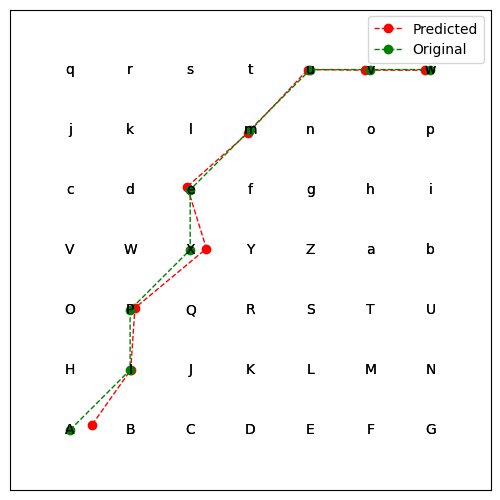

In [ ]:
import matplotlib.pyplot as plt

# Define the grid
grid = [
        ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
        ['H', 'I', 'J', 'K', 'L', 'M', 'N'],
        ['O', 'P', 'Q', 'R', 'S', 'T', 'U'],
        ['V', 'W', 'X', 'Y', 'Z', 'a', 'b'],
        ['c', 'd', 'e', 'f', 'g', 'h', 'i'],
        ['j', 'k', 'l', 'm', 'n', 'o', 'p'],
        ['q', 'r', 's', 't', 'u', 'v', 'w']]

# Define the path as a list of (x, y) coordinates
path= [(0.09,0.37),(1.0,1.01),(2.03, 1.08),(3.02,2.27),(4.05,1.95),(4.95,2.97),(6.0,3.96),(5.99,4.91),(5.99,5.91)]
path1 = [(0, 0),(1,1 ),( 2,1), (3 ,2), (4,2 ),(5,3),(6,4),(6,5),(6,6)]


# Set up the plot
fig, ax = plt.subplots(figsize=(6.2,6.5))
ax.set_xlim([-1, 7])
ax.set_ylim([-1, 7])
ax.set_frame_on(True)
ax.set_aspect('equal')

# Remove ticks and labels
ax.set_xticks([])
ax.set_yticks([])

# Plot the grid and path
for i in range(len(grid)):
    for j in range(len(grid[i])):
        ax.text(j, i, grid[i][j], ha='center', va='center', fontsize=10)
path_line, = ax.plot([p[1] for p in path], [p[0] for p in path], 'o--', color='red', linewidth=1)
for i in range(len(grid)):
    for j in range(len(grid[i])):
        ax.text(j, i, grid[i][j], ha='center', va='center', fontsize=10)
path_line, = ax.plot([p[1] for p in path1], [p[0] for p in path1], 'o--', color='green', linewidth=1)

# Add labels to the plot
ax.legend(['Predicted','Original'], loc='upper right')


# Save the figure
plt.savefig('my_plot1.png')

# Show the plot
plt.show()

plt.show()

In [ ]:
# Load the new data into a DataFrame
new_data = pd.read_csv('/content/output.csv')

# Make predictions using the Linear Regression model
lr_predictions = linear_model.predict(new_data)

# Make predictions using the Decision Tree Regressor model
dt_predictions = dt_model.predict(new_data)

# Make predictions using the Random Forest Regressor model
rf_predictions = rf_model.predict(new_data)

# Make predictions using the XGBoost Regressor model
xgb_predictions = xgb_model.predict(new_data)

# Print the predictions for each model
print("Linear Regression Predictions:")
print(lr_predictions)

print("\nDecision Tree Predictions:")
print(dt_predictions)

print("\nRandom Forest Predictions:")
print(rf_predictions)

print("\nXGBoost Predictions:")
print(xgb_predictions)


ValueError: ignored